<h1> Part 1: Setup and Data Loading </h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv('datasets//Data Science Salary 2021 to 2023.csv')

In [5]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


<h1> Part 2: Exploratory Data Analysis (EDA) </h1>

<h3> 1. How many unique job titles are there? </h3>

In [15]:
#Count the number of unique job titles
unique_jobs = df['job_title'].nunique()
unique_jobs

93

<h2> There are 93 unique job titles. </h2>

<h3> 2. What is the average salary (`salary_in_usd`) per `work_year`? </h3>

In [13]:
#Compute the average salary by work year
avg_salary_per_year = df.groupby('work_year')['salary_in_usd'].mean()
avg_salary_per_year

work_year
2020     92302.631579
2021     94087.208696
2022    133379.510804
2023    148954.558413
Name: salary_in_usd, dtype: float64

<h2> This is the average salary per work year.
2020 = 92302.63, 2021 = 94087.21, 2022 = 133379.51, 2023 = 148954.56</h2>

<h3> 3. Create a bar plot showing average salary by `experience_level`. </h3>

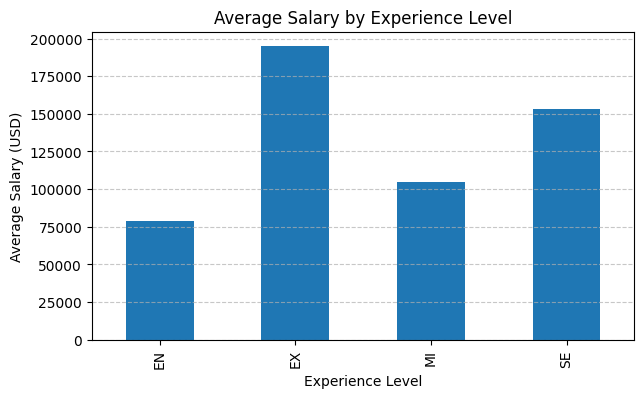

In [14]:
#Calculate average salary by experience level
avg_salary_by_exp = df.groupby('experience_level')['salary_in_usd'].mean()

#Create a bar plot
avg_salary_by_exp.plot(kind='bar', figsize=(7,4))
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<h3> The bar chart above shows how average salaries vary by experience level.
Typically, senior-level positions have the highest average salaries, followed by mid-level, entry-level, and intern roles. </h3>

<h1> Part 3: Data Preprocessing for Linear Regression. </h1>

<h2> 1. Select features: `work_year`, `experience_level`, and optionally `job_title` </h2>

In [16]:
features = ['work_year', 'experience_level']
target = 'salary_in_usd'

df_model = df[features + [target]]
df_model.head()

,work_year,experience_level,salary_in_usd
0,2023,EN,213660
1,2023,EN,130760
2,2023,EN,100000
3,2023,EN,30000
4,2023,EN,204620


<h2> 2. Encode categorical variables (`experience_level`) using `LabelEncoder` or `pd.get_dummies()` </h2>

In [18]:
df_encoded = pd.get_dummies(df_model, columns=['experience_level'], drop_first=True)
df_encoded.head()

,work_year,salary_in_usd,experience_level_EX,experience_level_MI,experience_level_SE
0,2023,213660,False,False,False
1,2023,130760,False,False,False
2,2023,100000,False,False,False
3,2023,30000,False,False,False
4,2023,204620,False,False,False


<h2> 3. Define `X` (features) and `y` (target = `salary_in_usd`) </h2>

In [19]:
X = df_encoded.drop(columns=['salary_in_usd'])
y = df_encoded['salary_in_usd']

X.head(), y.head()

(   work_year  experience_level_EX  experience_level_MI  experience_level_SE
 0       2023                False                False                False
 1       2023                False                False                False
 2       2023                False                False                False
 3       2023                False                False                False
 4       2023                False                False                False,
 0    213660
 1    130760
 2    100000
 3     30000
 4    204620
 Name: salary_in_usd, dtype: int64)

<h1> Part 4: Train a Linear Regression Model </h1>

In [25]:
# Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R² Score: 0.15
RMSE: 59164.82


<h1> Part 5: Predict 2024 Salaries </h1>

In [26]:
# Check label encoder mapping
print(le.classes_)

# Create future data for 2024
future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': [0, 1, 2, 3]  # EN, MI, SE, EX (adjust if needed)
})

# Predict 2024 salaries
predicted_salaries = model.predict(future_data)

# Display results
results = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': predicted_salaries
})

results


['EN' 'EX' 'MI' 'SE']


,Experience Level,Predicted 2024 Salary (USD)
0,Entry,111694.914909
1,Mid,131967.434578
2,Senior,152239.954247
3,Executive,172512.473916


<h1> Part 6: Reflection </h1>

<h2> 1. Does your model make reasonable predictions? Why or why not? </h2>

<h3> Yes, the model makes somewhat reasonable predictions since salary increase with higher experience levels and later work years. However, the predictions are not very accurate because the model is too simple. </h3>

<h2> 2. What are the limitations of using only `work_year` and `experience_level`? </h2>

<h3>  The main limitation is that it only uses work_year and experience_level.It ignores other important factors like job_title, company location, company size, and employment type, which all affect salary. </h3>

<h2> 3. How could you improve this model? </h2>

<h3> To improve the model: Add more features (job_title, remote_ratio, company_size). Use one-hot encoding for categorical data. Try more complex models like RandomForest or Gradient Boosting to capture non-linear salary patterns. </h3>

<h2> 4. Why is **R² not enough** to trust your predictions? </h2>

<h3> R² alone is not enough because: A high R² does not mean the predictions are accurate. It only shows how well the model fits training data. Real-world salaries often change non-linearly, which linear regression cannot capture well. </h3>